In [1]:
import src.data.data_load as data_load
import src.data.processing as processing
import src.data.imputing as imputing
import src.data.feature_engin as feature_engin

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


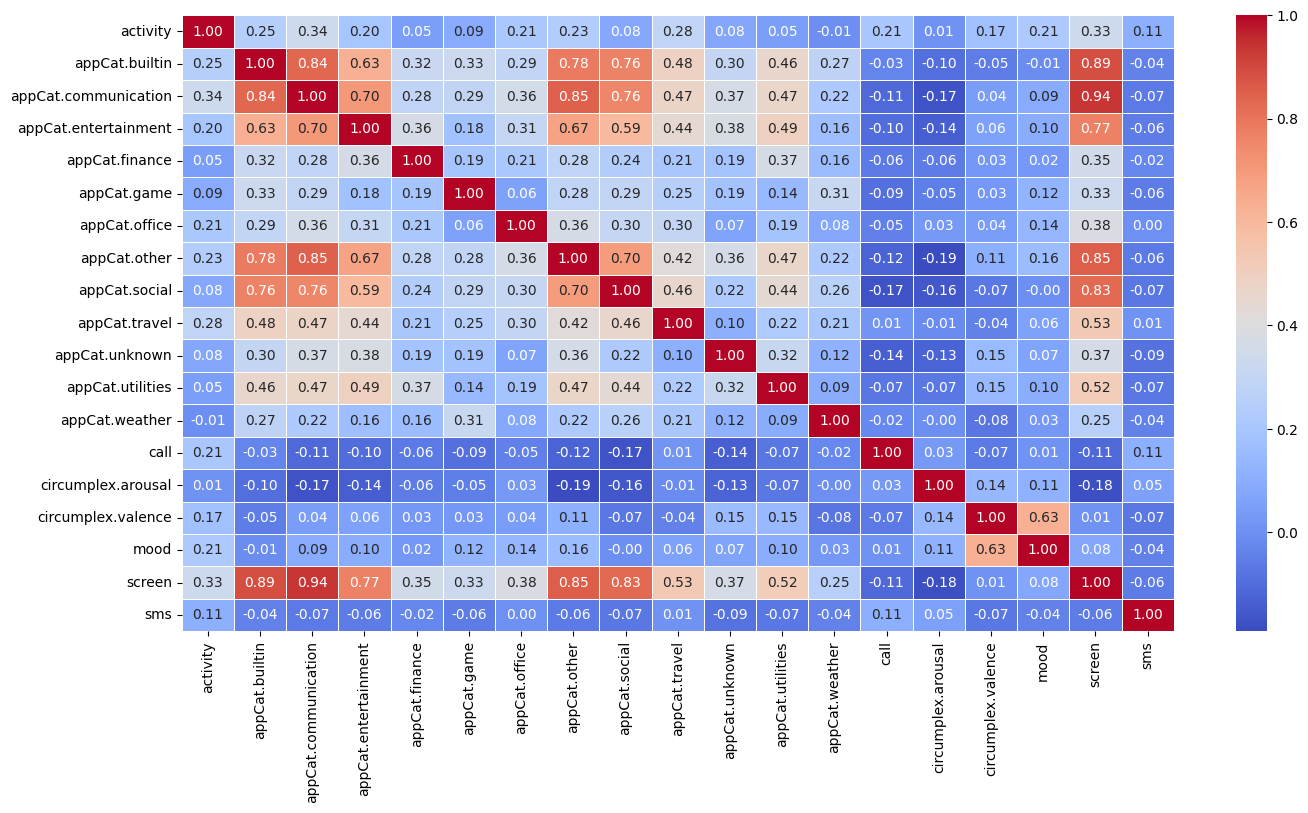

In [3]:
# Step 1: 计算协方差矩阵（自动跳过 NaN）
filepath = "./raw_data/dataset_mood_smartphone_wide.csv"
df_raw = pd.read_csv(filepath) if filepath.endswith('.csv') else pd.read_excel(filepath)
df_raw['time'] = pd.to_datetime(df_raw['time'])
df_daily = processing.aggregate_by_day(df_raw)

# 假设你的 DataFrame 叫 df_raw
df_daily['date'] = pd.to_datetime(df_daily['date'])  # 确保 date 列是 datetime 类型

numeric_df = df_daily.drop(columns=['id', 'date'])
corr_matrix = numeric_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

